In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
image_folder = '/content/drive/MyDrive/temp'


In [ ]:
import os
import pandas as pd
import shutil



In [ ]:
pd.read_csv("/content/diabeticretinopathy - Sheet1.csv")

,image,class
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1
5,15_right,2
6,16_left,4
7,16_right,4
8,17_left,0
9,17_right,1


In [ ]:
import os

# Specify the directory path
new_dir = "/content/basedir"

# Create the directory
if not os.path.exists(new_dir):
    os.makedirs(new_dir)

print(f"Directory '{new_dir}' created successfully.")


Directory '/content/basedir' created successfully.


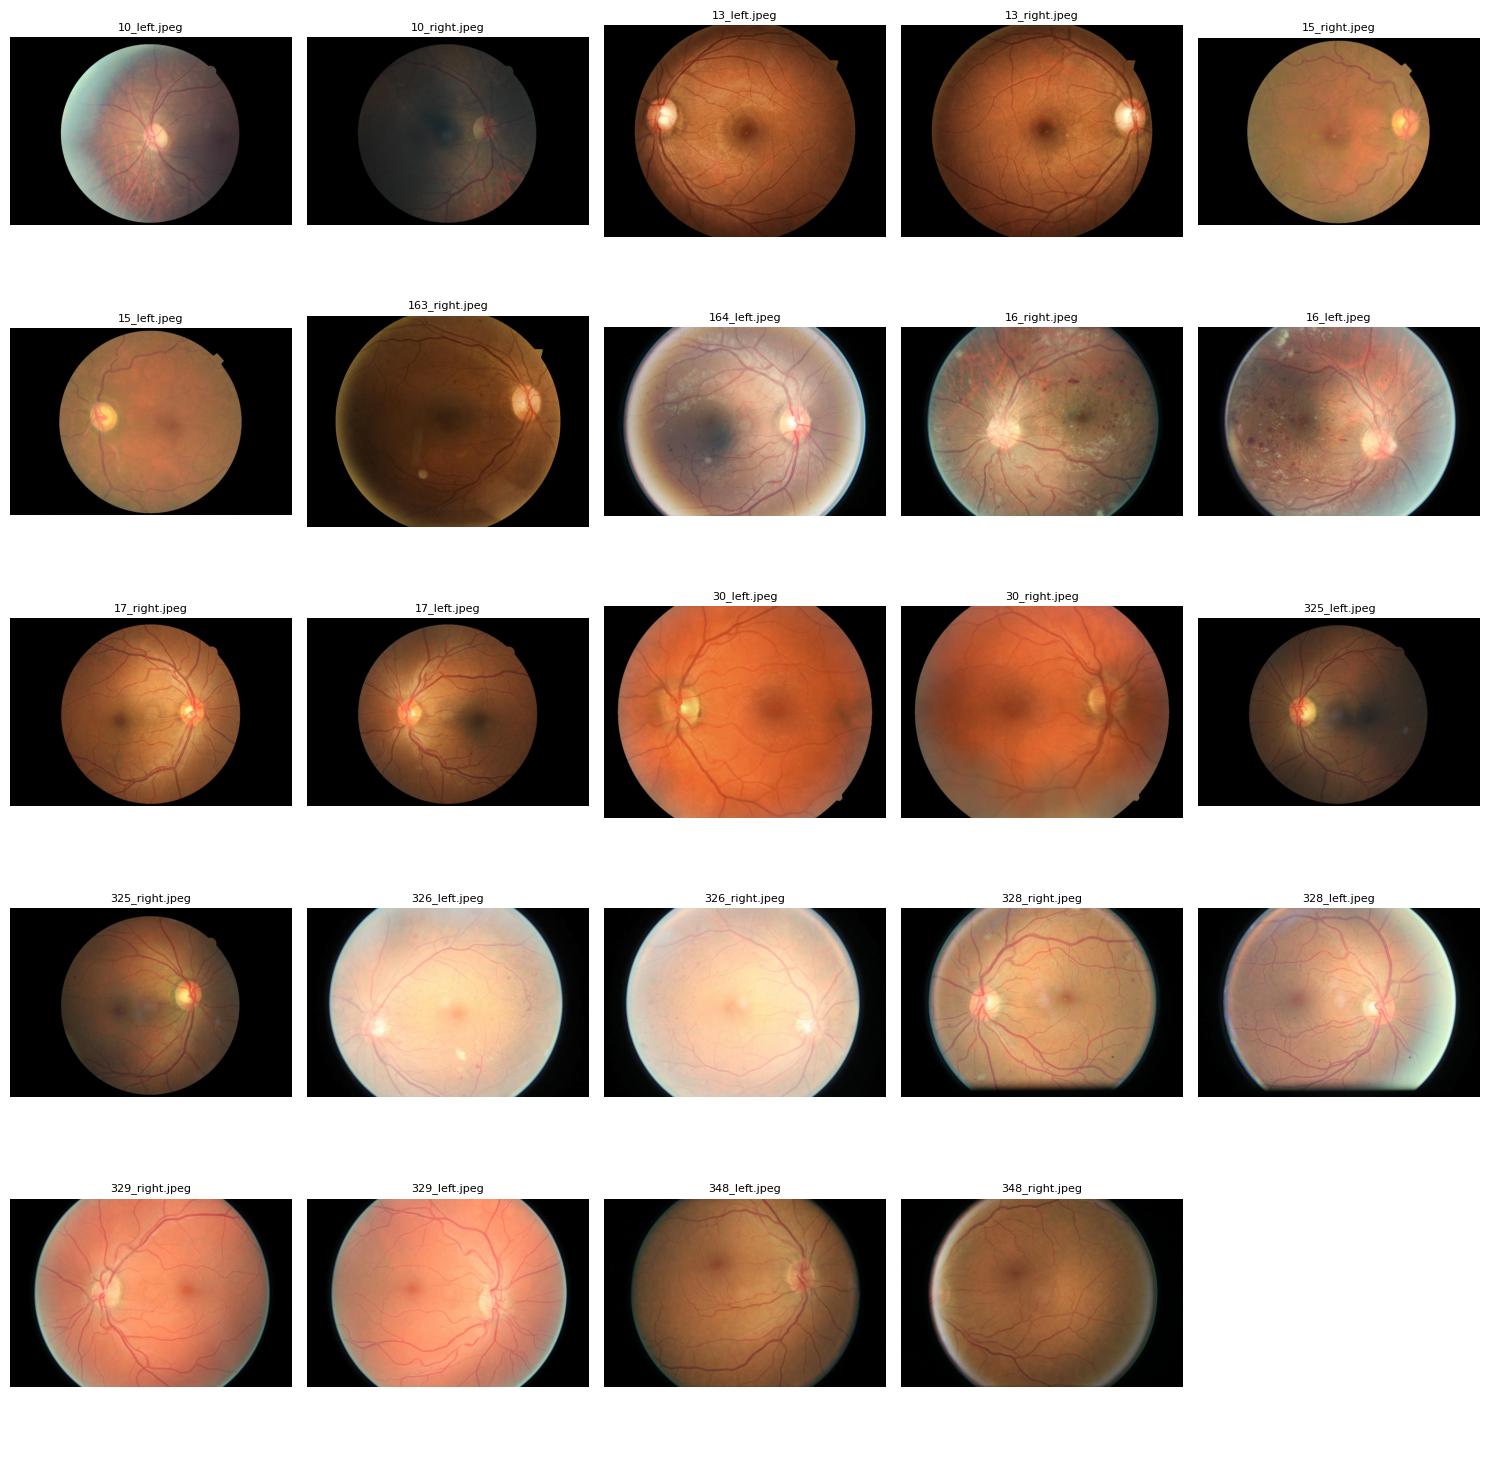

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_folder = '/content/drive/MyDrive/temp'

# List all image files in the directory
all_images = os.listdir(image_folder)

# Calculate the number of rows and columns for the grid
num_images = len(all_images)
num_cols = 5  # Adjust as needed
num_rows = (num_images + num_cols - 1) // num_cols

# Create the plot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows))

# Loop through the images and display each one
for i, ax in enumerate(axes.flat):
    if i < num_images:  # Check if we still have images to display
        # Get the full path of the image
        img_path = os.path.join(image_folder, all_images[i])

        # Read the image
        img = mpimg.imread(img_path)

        # Display the image
        ax.imshow(img)

        # Set the image name as the title
        ax.set_title(all_images[i], fontsize=8)

        # Turn off the axis
        ax.axis('off')
    else:
        # Hide any extra subplots if there are fewer images than subplots
        ax.axis('off')

# Adjust the layout
plt.tight_layout()
plt.show()

In [ ]:
# Load the CSV file
csv_file = "/content/diabeticretinopathy - Sheet1.csv"
image_dir = "/content/drive/MyDrive/temp"
output_dir = "/content/basedir"

df = pd.read_csv(csv_file)

# Print the column names to verify if 'image_name' exists
print(df.columns)

# If 'image_name' doesn't exist, replace with the actual column name
# For example, if the actual column name is 'filename', use the following:
# image_name = row['filename']
# in the loop below.


# Create class-based folders
for class_name in df['class'].unique():
    # Convert class_name to string before joining
    class_folder = os.path.join(output_dir, str(class_name))
    if not os.path.exists(class_folder):
        os.makedirs(class_folder)

# Move each image to the respective class folder
for index, row in df.iterrows():
    # Replace 'image_name' with the actual column name from your CSV
    image_name = row['image']  +".jpeg"
    class_name = row['class']

    src_path = os.path.join(image_dir, image_name)
    dest_path = os.path.join(output_dir, str(class_name), image_name) # Ensure class_name is a string

    if os.path.exists(src_path):
        shutil.move(src_path, dest_path)
    else:
        print(f"Image {image_name} not found in {image_dir}")

Index(['image', 'class'], dtype='object')
Image 163_left.jpeg not found in /content/drive/MyDrive/temp


In [ ]:
output_dir="/content/basedir"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    output_dir,  # Path to the base directory where class folders are
    target_size=(150, 150),  # Resize images
    batch_size=32,
    class_mode='categorical',  # For multi-class classification
    subset='training'
)



Found 23 images belonging to 5 classes.


In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(5, activation='softmax')  # Assuming 10 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(
    train_generator,
    epochs=10
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.0870 - loss: 1.6182
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3043 - loss: 3.6491
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.2609 - loss: 2.1181
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4348 - loss: 1.7781
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3043 - loss: 1.5254
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5217 - loss: 1.3811
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4348 - loss: 1.3196
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3913 - loss: 1.2246
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5217 - loss: 1.1124
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6957 - loss: 1.0178


In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57,108,689 (217.85 MB)

 Trainable params: 19,036,229 (72.62 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 38,072,460 (145.23 MB)

In [ ]:
print(history.history['accuracy'])

# To get the accuracy for the last epoch
print(history.history['accuracy'])

[0.08695652335882187, 0.30434781312942505, 0.260869562625885, 0.43478259444236755, 0.30434781312942505, 0.52173912525177, 0.43478259444236755, 0.3913043439388275, 0.52173912525177, 0.695652186870575]
[0.08695652335882187, 0.30434781312942505, 0.260869562625885, 0.43478259444236755, 0.30434781312942505, 0.52173912525177, 0.43478259444236755, 0.3913043439388275, 0.52173912525177, 0.695652186870575]


In [ ]:
test="/content/256_left.jpeg"

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

def load_and_preprocess_image(img_path, target_size=(150,150,3)):
    # Load the image and resize it to the target size
    img = image.load_img(img_path, target_size=target_size)

    # Convert the image to an array
    img_array = image.img_to_array(img)

    # Expand dimensions to match the input shape (1, height, width, channels)
    img_array = np.expand_dims(img_array, axis=0)

    # Scale the pixel values to [0, 1] range if your model was trained with scaled inputs
    img_array /= 255.0

    return img_array


In [ ]:
def predict_image(model, img_path, class_labels):
    # Preprocess the image
    img_array = load_and_preprocess_image(img_path)

    # Make the prediction
    predictions = model.predict(img_array)

    # Find the class with the highest probability
    predicted_index = np.argmax(predictions, axis=1)[0]

    # Map the index to the class label
    predicted_class = class_labels[predicted_index]
    confidence = predictions[0][predicted_index] * 100  # Confidence as a percentage

    return predicted_class, confidence


In [ ]:
# Example: if you have 2 classes, like 'cat' and 'dog'
class_labels = ['0', '1','2','3','4']


In [ ]:
img_path = '/content/256_left.jpeg'
predicted_class, confidence = predict_image(model, img_path, class_labels)

print(f"Predicted Class: {predicted_class} with {confidence:.2f}% confidence.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
Predicted Class: 0 with 59.14% confidence.


In [ ]:
# Save the model in .h5 format
model.save('my_model.h5')


In [ ]:
import os
import random
import shutil

def split_data(source_dir, train_dir, val_dir, test_dir, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15):
    classes = [d for d in os.listdir(source_dir) if os.path.isdir(os.path.join(source_dir, d))]

    for cls in classes:
        cls_folder = os.path.join(source_dir, cls)
        images = os.listdir(cls_folder)
        random.shuffle(images)

        # Calculate split sizes
        train_size = int(len(images) * train_ratio)
        val_size = int(len(images) * val_ratio)

        # Create directories if not exist
        os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
        os.makedirs(os.path.join(val_dir, cls), exist_ok=True)
        os.makedirs(os.path.join(test_dir, cls), exist_ok=True)

        # Split images
        for i, img in enumerate(images):
            img_path = os.path.join(cls_folder, img)
            if i < train_size:
                shutil.copy(img_path, os.path.join(train_dir, cls))
            elif i < train_size + val_size:
                shutil.copy(img_path, os.path.join(val_dir, cls))
            else:
                shutil.copy(img_path, os.path.join(test_dir, cls))

# Paths for original and destination folders
source_dir = "/content/basedir"
train_dir = "dataset/train"
val_dir = "dataset/validation"
test_dir = "dataset/test"

# Run the function
split_data(source_dir, train_dir, val_dir, test_dir)


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False


In [ ]:
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)

output_layer = Dense(4, activation='softmax')(x)

# Create a new model with the custom top layers
model = Model(inputs=base_model.input, outputs=output_layer)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Only rescale the images
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Define the train and validation generators
train_generator = train_datagen.flow_from_directory(
    '/content/dataset/train',           # Replace with your train data path
    target_size=(224, 224),          # Adjust to match your model's input size
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    '/content/dataset/validation',      # Replace with your validation data path
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 13 images belonging to 5 classes.
Found 1 images belonging to 5 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')  # Output layer matches the number of classes
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=10
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.2308 - loss: 1.5947 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3077 - loss: 15.2269 - val_accuracy: 0.0000e+00 - val_loss: 17.9431
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2308 - loss: 8.5092 - val_accuracy: 0.0000e+00 - val_loss: 12.8743
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.4615 - loss: 3.6011 - val_accuracy: 0.0000e+00 - val_loss: 10.6122
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3077 - loss: 3.2637 - val_accuracy: 0.0000e+00 - val_loss: 6.1706
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3846 - loss: 2.0518 - val_accuracy: 0.0000e+00 - val_loss: 2.7326
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6154 - loss: 1.2477 - val_accuracy: 1.0000 - val_loss: 0.6994
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5385 - loss: 1.1334 - val_accuracy: 0.0000e+00 - val_loss: 1.

In [ ]:
for layer in base_model.layers[-4:]:  # Unfreeze last 4 layers
    layer.trainable = True

# Re-compile with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train again
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=5
)


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.9231 - loss: 0.7117 - val_accuracy: 1.0000 - val_loss: 1.2971
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9231 - loss: 0.7028 - val_accuracy: 1.0000 - val_loss: 1.2817
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.6942 - val_accuracy: 1.0000 - val_loss: 1.2662
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.6857 - val_accuracy: 1.0000 - val_loss: 1.2487
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.6776 - val_accuracy: 1.0000 - val_loss: 1.2308


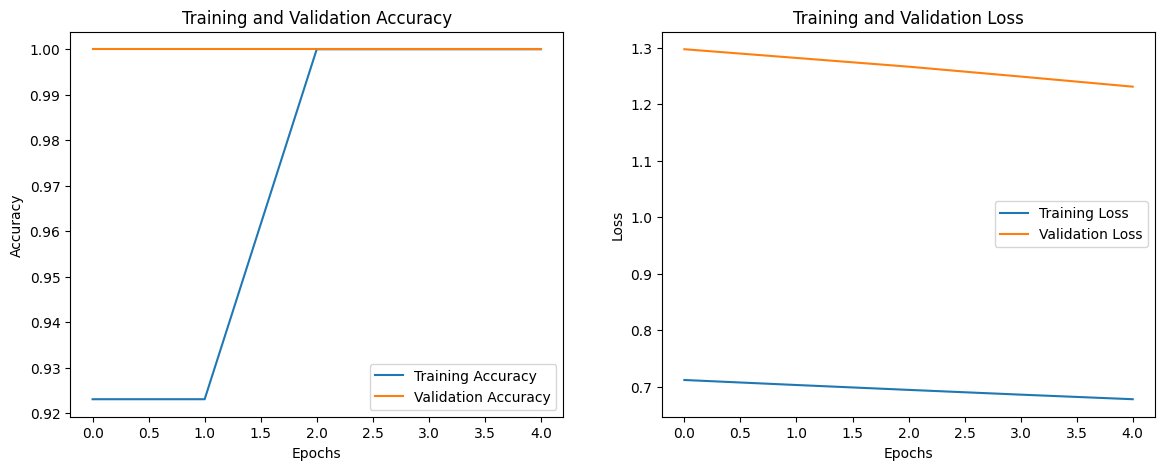

In [ ]:
import matplotlib.pyplot as plt

# Extract accuracy and loss from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot accuracy
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [ ]:
for layer in base_model.layers:
    layer.trainable = False


In [ ]:
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
# Assuming you have 5 classes, use Dense(5, activation='softmax')
output_layer = Dense(5, activation='softmax')(x)

# Create a new model with the custom top layers
model = Model(inputs=base_model.input, outputs=output_layer)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Only rescale the images
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Define the train and validation generators
train_generator = train_datagen.flow_from_directory(
    '/content/dataset/train',           # Replace with your train data path
    target_size=(224, 224),          # Adjust to match your model's input size
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    '/content/dataset/validation',      # Replace with your validation data path
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 13 images belonging to 5 classes.
Found 1 images belonging to 5 classes.


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=10
)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.1538 - loss: 2.2966 - val_accuracy: 1.0000 - val_loss: 0.0120
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.3846 - loss: 7.5101 - val_accuracy: 0.0000e+00 - val_loss: 7.9687
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.2308 - loss: 6.5849 - val_accuracy: 0.0000e+00 - val_loss: 13.0580
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.2308 - loss: 7.4887 - val_accuracy: 0.0000e+00 - val_loss: 5.1523
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.2308 - loss: 5.4923 - val_accuracy: 1.0000 - val_loss: 0.0898
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.4615 - loss: 4.1330 - val_accuracy: 1.0000 - val_loss: 0.4982
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.3846 - loss: 2.5994 - val_accuracy: 0.0000e+00 - val_loss: 4.5390
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.4615 - loss: 2.5215 - val_accuracy: 0.0000e+00 - val_

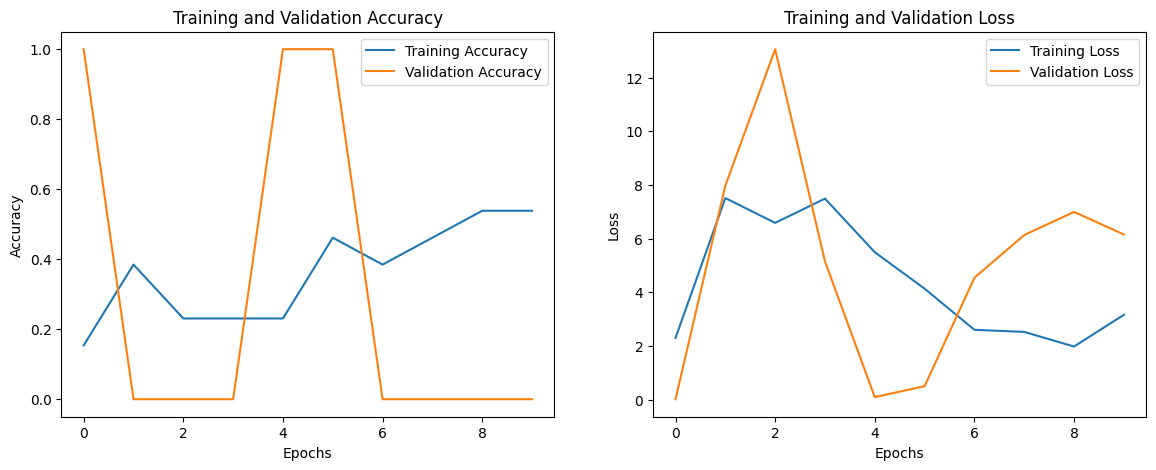

In [ ]:
import matplotlib.pyplot as plt

# Extract accuracy and loss from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot accuracy
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
